In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# LOAD THE DATA SET

In [ ]:
# Load the data set
mushrooms= pd.read_csv('/content/mushrooms2 (3).csv')
# Display the first few rows
print(mushrooms)

          class cap-shape cap-surface cap-color bruises     odor population  \
0     poisonous    convex      smooth     brown     yes  pungent  scattered   
1        edible    convex      smooth    yellow     yes   almond   numerous   
2        edible      bell      smooth     white     yes    anise   numerous   
3     poisonous    convex       scaly     white     yes  pungent  scattered   
4        edible    convex      smooth      gray      no     none   abundant   
...         ...       ...         ...       ...     ...      ...        ...   
8119     edible   knobbed      smooth     brown      no     none  clustered   
8120     edible    convex      smooth     brown      no     none    several   
8121     edible      flat      smooth     brown      no     none  clustered   
8122  poisonous   knobbed       scaly     brown      no    fishy    several   
8123     edible    convex      smooth     brown      no     none  clustered   

      habitat  
0       urban  
1     grasses  
2  

In [ ]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,6,7
top,edible,convex,scaly,brown,no,none,several,woods
freq,4208,3656,3244,2284,4748,3528,4040,3148


# Check for Missing Values

In [ ]:
mushrooms.isna().sum()

class          0
cap-shape      0
cap-surface    0
cap-color      0
bruises        0
odor           0
population     0
habitat        0
dtype: int64

# DISPLAY VARIABLE TYPE

In [ ]:
# Display variable types in chdDataSelected
variable_types = mushrooms.dtypes

# Print the variable types
print(variable_types)

class          object
cap-shape      object
cap-surface    object
cap-color      object
bruises        object
odor           object
population     object
habitat        object
dtype: object


# Data Visualization

  # histogram

([<matplotlib.axis.XTick at 0x7a16abefef50>,
 [Text(0, 0, 'Edible'), Text(1, 0, 'Poisonous')])

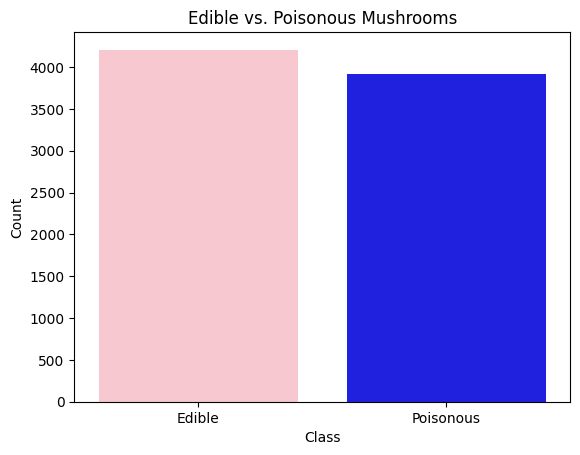

In [ ]:
# Define custom colors for each class
colors = ["pink", "blue"]

# Map class values to labels
class_labels = {0: "Edible", 1: "Poisonous"}

# Use sns.countplot with custom colors and class labels
sns.countplot(x="class", data=mushrooms, palette=colors)

# Customize plot labels and title
plt.title('Edible vs. Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')


# Update x-axis ticks with class labels
plt.xticks([0, 1], [class_labels[0], class_labels[1]])

# heat map

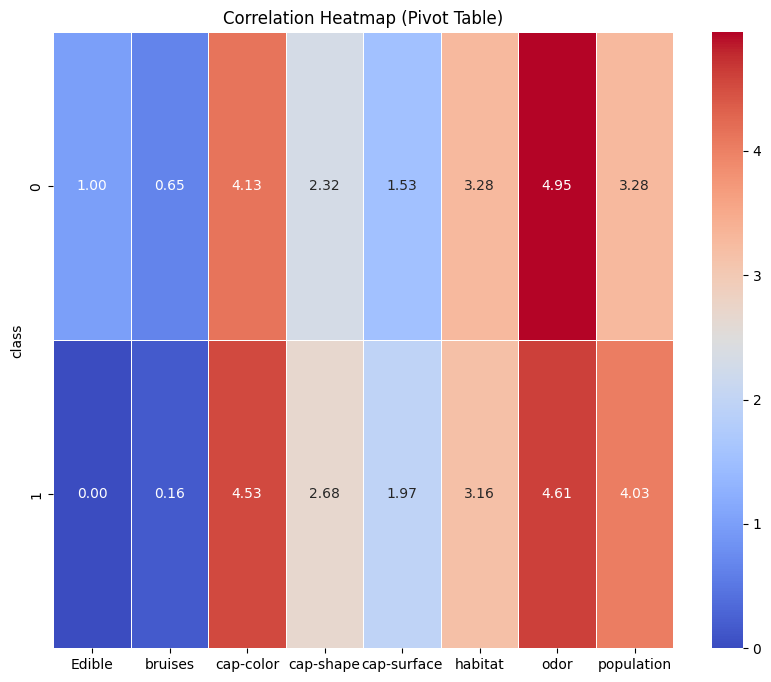

In [ ]:
# Convert categorical variables to numerical labels
for column in mushrooms.columns:
    mushrooms[column] = pd.Categorical(mushrooms[column]).codes

# Create a pivot table
pivot_table = mushrooms.pivot_table(index='class', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Pivot Table)')
plt.show()

# Building a Decision tree

In [ ]:
# Encodining the dependent variable
mushrooms['Edible'] = mushrooms['class'].apply(lambda x: "Yes" if x == 'edible' else "No")
mushrooms['Edible'] = mushrooms['Edible'].astype('category')

In [ ]:
# Selecting features
X_mushroom = mushrooms[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'population', 'habitat']]
Y_mushroom = mushrooms['Edible']

In [ ]:
#  Converting Categorical Variables to Numerical using one hot encoding
X = pd.get_dummies(mushrooms.drop(['class','Edible'], axis=1), drop_first=True)

In [ ]:
# Build the Decision Tree Model
X_train, X_test, y_train, y_test = train_test_split(X, Y_mushroom, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

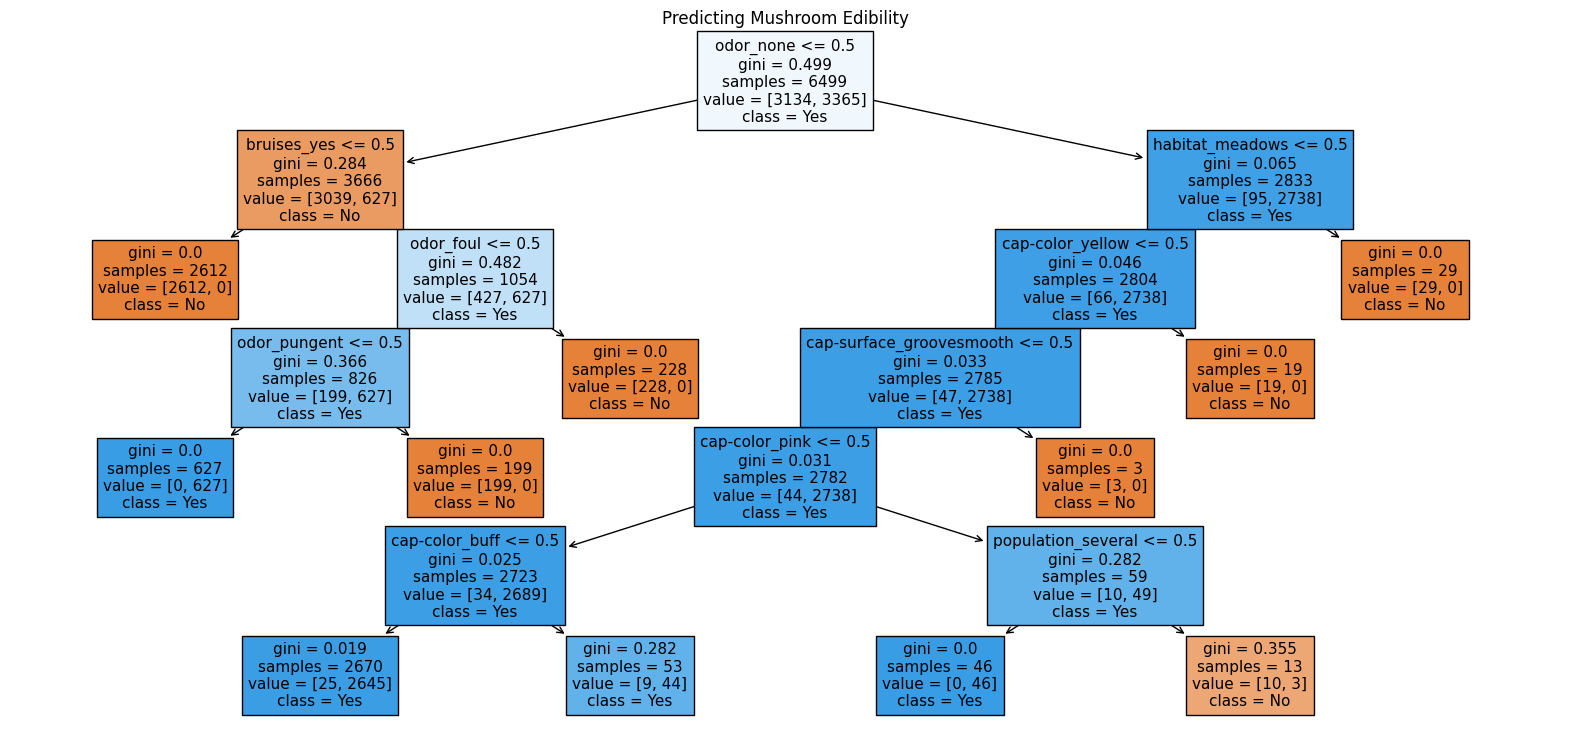

In [ ]:
 # Visualizing the Decision Tree
plt.figure(figsize=(20, 9))
plot_tree(model, filled=True, feature_names=list(X.columns), class_names=list(model.classes_))
plt.title("Predicting Mushroom Edibility")
plt.show()

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9932307692307693


In [ ]:
#Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[772  10]
 [  1 842]]
